In [32]:
# set up environment 
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns, statistics as stats
import scipy as sp 
print ('done')

done


# load file 

In [3]:
df = pd.read_csv ("datasets/africa_food_prices.csv")
df.head(9)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN
5,15432,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,9,2015,80.0,NaN
6,15433,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,10,2015,80.0,NaN
7,15434,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,11,2015,85.0,NaN
8,15435,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,12,2015,85.0,NaN


# Data Cleaning and Transformation 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [6]:
# checking for null values 
print(df.isnull().sum())

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64


In [106]:
# checking the shape
df.shape

(830101, 20)

In [8]:
# checking the colunms 
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [9]:
# summary of numeric columns and text columns 
df.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price,mp_commoditysource
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05,0.0
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03,NaN
std,5.159597e+05,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05,NaN
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00,NaN
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01,NaN
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02,NaN
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02,NaN
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07,NaN


In [10]:
# rename of columns
df.rename({"Unnamed: 0":"id"},axis=1, inplace=True)

In [34]:
df.head(3)

,id,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN


In [14]:
# rename a columns
df.rename({"um_unit_id":"unit_id"}, axis=1,inplace=True)

In [31]:
df.columns

Index(['id', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [16]:
#df.dtypes
df.describe(include='object')

,country,state,market,produce,currency,market_type,quantity
count,956779,830101,956779,956779,956779,956779,956779
unique,42,311,1696,457,34,3,81
top,Rwanda,North/Amajyaruguru,Serrekunda,Millet - Retail,XOF,Retail,KG
freq,137746,34770,4130,47476,227321,885918,712729


In [17]:
df.produce.unique()

array(['Rice - Retail', 'Bread - Retail', 'Beans (white) - Retail',
       'Milk - Retail', 'Potatoes - Retail', 'Eggs - Retail',
       'Meat (chicken) - Retail', 'Sugar - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail', 'Oil - Retail',
       'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (diesel) - Retail',
       'Fuel (petrol-gasoline) - Retail', 'Fish (canned) - Retail',
       'Apples - Retail', 'Oranges - Retail', 'Milk (camel) - Retail',
       'Meat (camel) - Retail', 'Tea (sahm) - Retail',
       'Oil (palm) - Retail', 'Cassava flour - Retail',
       'Maize flour - Retail', 'Rice (regular, milled) - Retail',
       'Milk (powder) - Retail', 'Oil (soybean) - Retail',
       'Sugar (white) - Retail', 'Salt (iodised) - Retail',
       'Rice (white, imported) - Retail', 'Maize meal (yellow) - Retail',
       'Fish (mackerel, dry) - Retail', 'Beans (kidney, 

In [18]:
# checking the country unique
df.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [19]:
# checking the market unique
df.market.unique()

array(['Algiers', 'Tindouf', 'Samara', ..., 'Rutendo 6', 'Matibi',
       'Mbilashaba'], dtype=object)

In [20]:
# Value count 
df.produce.value_counts()

produce
Millet - Retail                     47476
Rice (imported) - Retail            47022
Sorghum - Retail                    44679
Maize - Retail                      43073
Maize (white) - Retail              33786
                                    ...  
Millet (white) - Wholesale              1
Potatoes (unica) - Retail               1
Kocho - Retail                          1
Beans (haricot, red) - Wholesale        1
Sorghum (biofortified) - Retail         1
Name: count, Length: 457, dtype: int64

In [21]:
# Fill missing values in a column 'price' with the median
df['price'].fillna(df['price'].median(), inplace=True)

In [22]:
#Drop rows with missing values in columns 'product_name' and 'state'
df.dropna(subset=['produce', 'state'], how='any', inplace=True)

In [78]:
# Convert year and month to date
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Display the updated DataFrame
print(df)

             id  country_id   country  state_id     state  market_id  \
0         15427         4.0   Algeria       344     Alger       1794   
1         15428         4.0   Algeria       344     Alger       1794   
2         15429         4.0   Algeria       344     Alger       1794   
3         15430         4.0   Algeria       344     Alger       1794   
4         15431         4.0   Algeria       344     Alger       1794   
...         ...         ...       ...       ...       ...        ...   
956774  2050633       271.0  Zimbabwe      3444  Midlands       5594   
956775  2050634       271.0  Zimbabwe      3444  Midlands       5594   
956776  2050635       271.0  Zimbabwe      3444  Midlands       5594   
956777  2050636       271.0  Zimbabwe      3444  Midlands       5594   
956778  2050637       271.0  Zimbabwe      3444  Midlands       5594   

            market  produce_id                  produce  currency_id currency  \
0          Algiers          52            Rice - Retai

In [80]:
# checking the date
df.Date

0        2015-04-01
1        2015-05-01
2        2015-06-01
3        2015-07-01
4        2015-08-01
            ...    
956774   2021-06-01
956775   2021-06-01
956776   2021-06-01
956777   2021-06-01
956778   2021-06-01
Name: Date, Length: 830101, dtype: datetime64[ns]

In [23]:
df['price'].describe()

count    8.301010e+05
mean     4.538529e+03
std      1.483042e+05
min      0.000000e+00
25%      1.250000e+02
50%      3.000000e+02
75%      8.500000e+02
max      1.725000e+07
Name: price, dtype: float64

In [24]:
# mean,median,mode and standard deviation of price columns 

In [25]:
stats.mode(df.price)

200.0

In [26]:
stats.stdev(df.price)

148304.19700164488

In [27]:
stats.median(df.price)

300.0

In [28]:
stats.mean(df.price)

4538.528879986652

#  Research Questions:

 Q1 Which regions have the highest and lowest average food prices?

 Q2 What are the top three food categories with the most significant price variations?

 Q3 using a plot show the top 7 most sold product?

 Q4 the top/bottom 10 market with the highest price?

 Q5 what country sold the  most product?

In [107]:
 # Q1
 # Calculate the average prices for each region
average_prices_by_state = df.groupby('state')['price'].mean().sort_values()

# Identify the region with the highest and lowest average prices
highest_average_price = average_prices_by_state.idxmax()
lowest_average_price = average_prices_by_state.idxmin()

# Display the results
print(f"Highest average price: {highest_average_price}")
print(f"Lowest average price: {lowest_average_price}")


Highest average price: Mudug
Lowest average price: Gauteng


In [109]:
# Q2
# Calculate the standard deviation of prices for each food category
price_variations = df.groupby('produce')['price'].std().sort_values(ascending=False)

# Extract top three food categories with the most significant price variations
top_three_categories = price_variations.head(3)
print(top_three_categories)


produce
Meat (camel) - Retail         3.852934e+06
Livestock (Goat) - Retail     3.134872e+05
Livestock (camel) - Retail    1.370115e+05
Name: price, dtype: float64


In [110]:
# Q3 
# Count occurrences of each product and select the top 7 most sold products
top_7_products =df['produce'].value_counts().head(7)

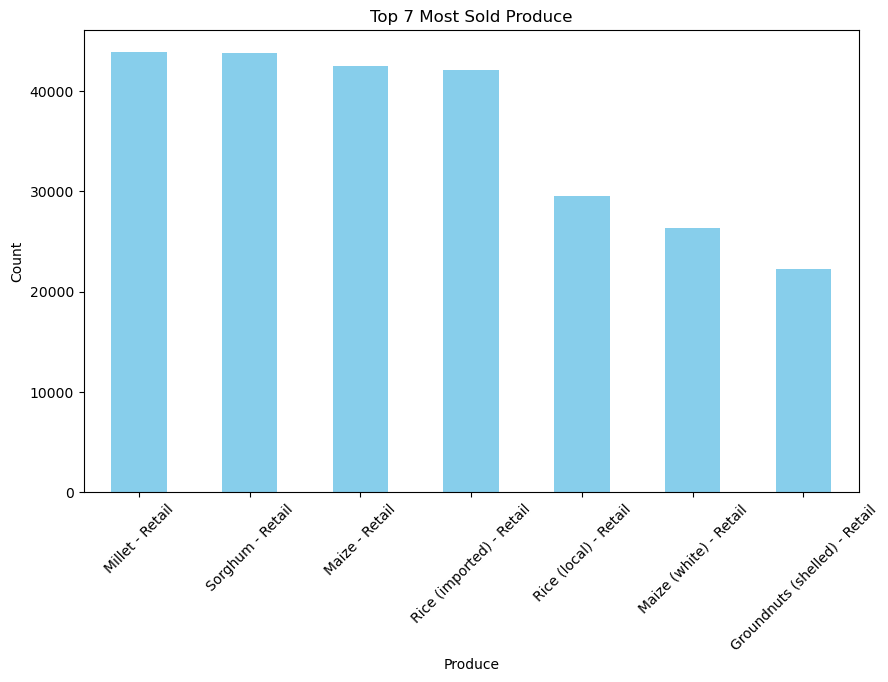

In [39]:
# Create a bar plot for the top 7 most sold products
plt.figure(figsize=(10, 6))
top_7_products.plot(kind='bar', color='skyblue')
plt.title('Top 7 Most Sold Produce')
plt.xlabel('Produce')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [111]:
#Q4
# Group data by market and calculate mean prices
market_avg_prices = df.groupby('market')['price'].mean()

# Find the top 10 markets with the highest average prices
top_10_markets = market_avg_prices.nlargest(10)
# Group data by market and calculate mean prices
market_avg_prices = df.groupby('market')['price'].mean()

# Find the top 10 markets with the highest average prices
top_10_markets = market_avg_prices.nlargest(10)


In [63]:
# Sort markets by price in ascending order to get bottom 10 markets with lowest prices
bottom_10_markets =df.nsmallest(10, 'price')

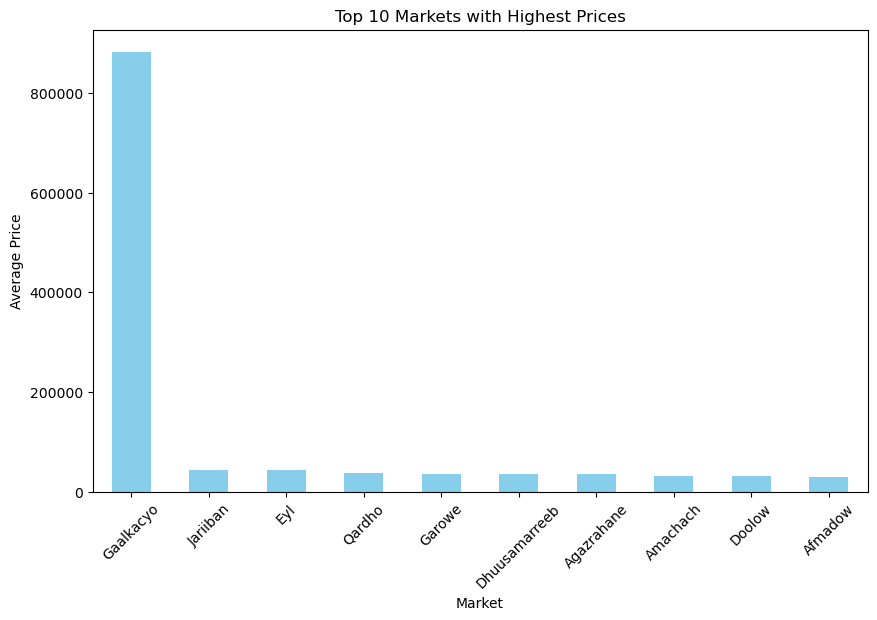

In [61]:
# Create a bar plot for the top 10 markets with highest prices
plt.figure(figsize=(10, 6))
top_10_markets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Markets with Highest Prices')
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

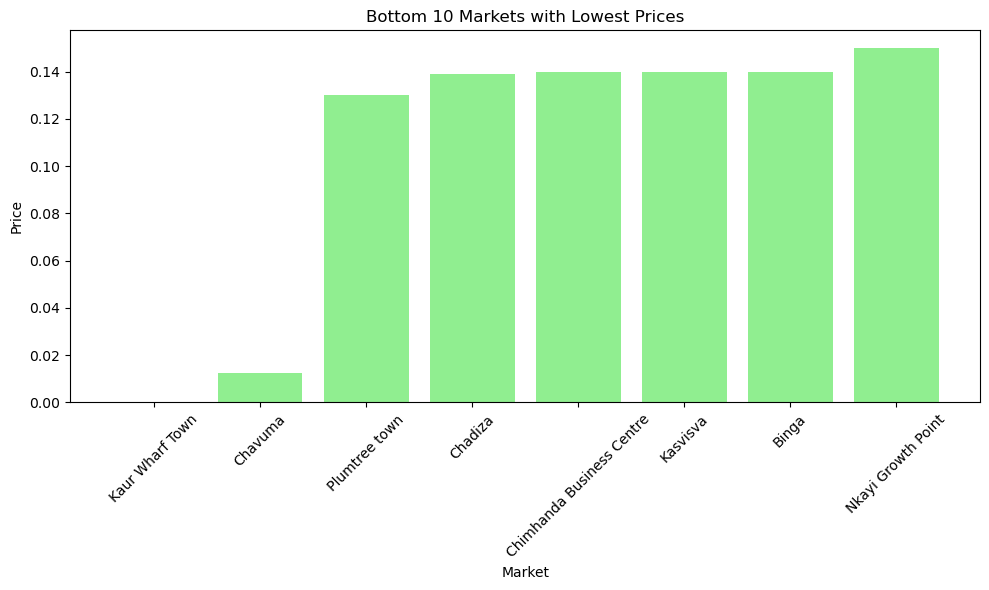

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_markets['market'], bottom_10_markets['price'], color='lightgreen')
plt.title('Bottom 10 Markets with Lowest Prices')
plt.xlabel('Market')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

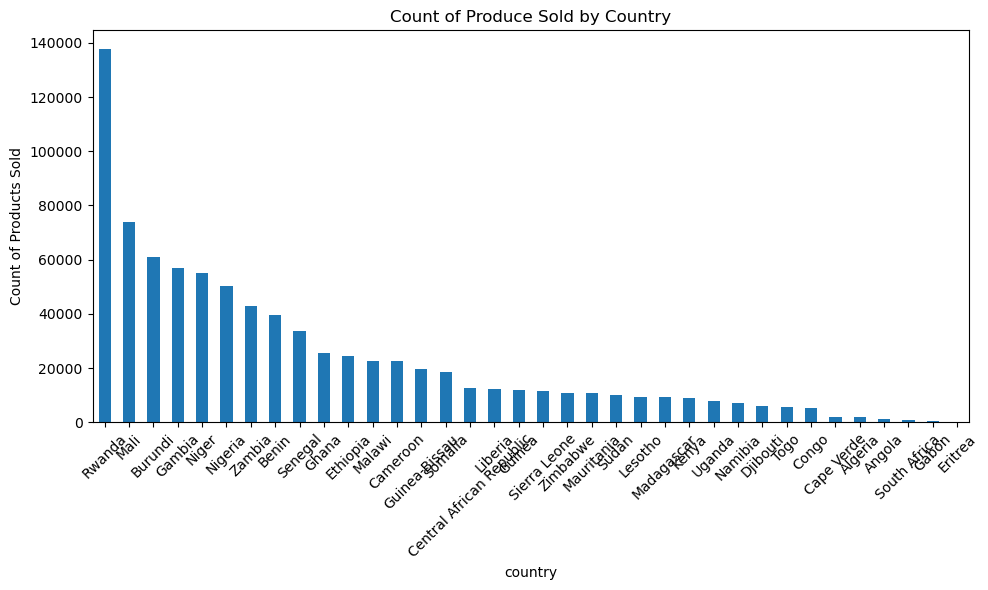

In [112]:
#Q5
# Group the data by country and calculate the sum of products sold
sales_by_country =df.groupby('country')['produce'].count().sort_values(ascending=False)

# Plot a bar chart showing the count of products sold by each country
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar')
plt.title('Count of Produce Sold by Country')
plt.xlabel('country')
plt.ylabel('Count of Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize the trends in the dataset

In [91]:
# Convert 'Date' column to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

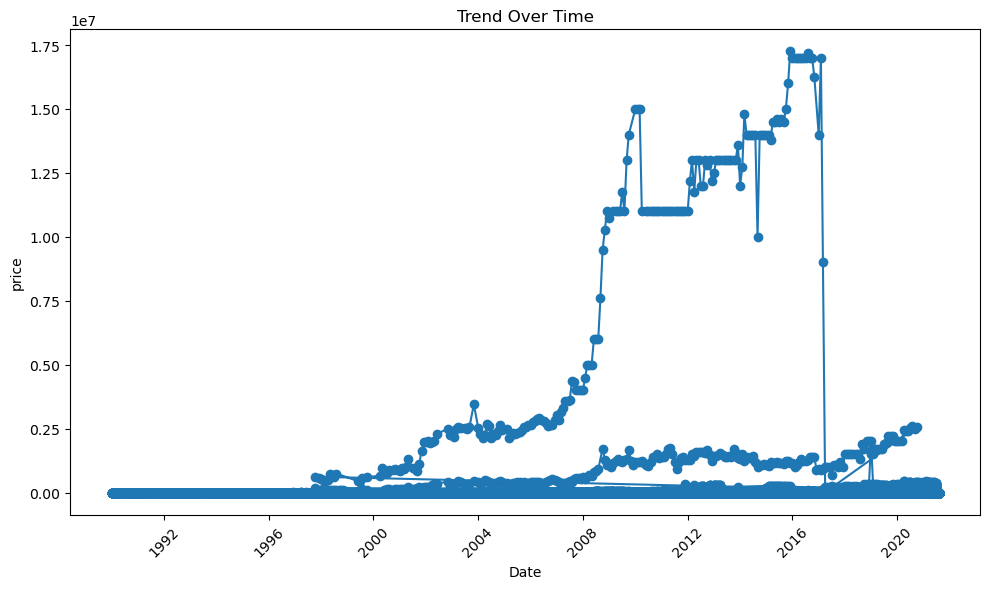

In [95]:
# Line plot to visualize trends over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['price'], marker='o', linestyle='-')
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


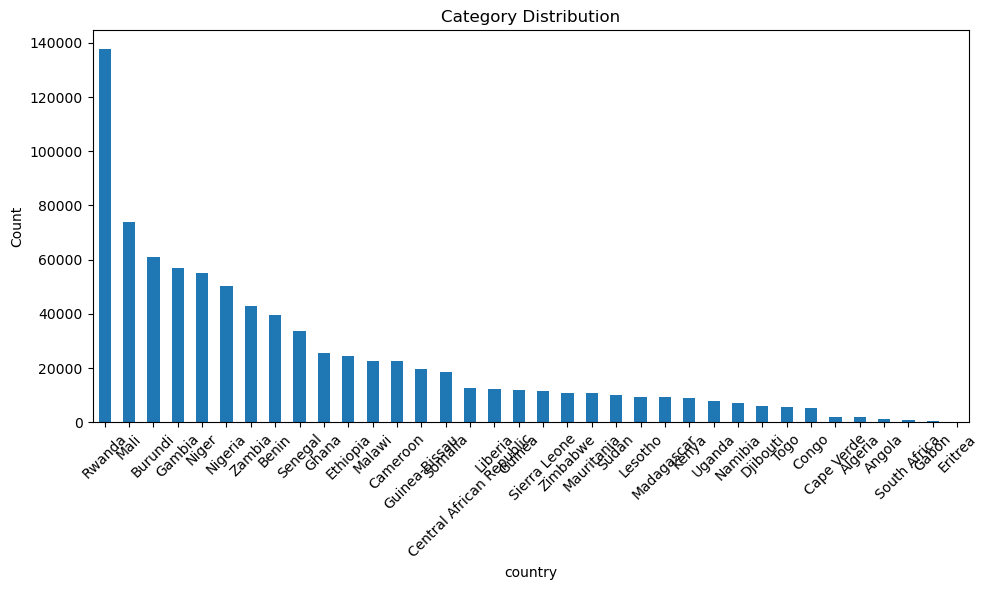

In [105]:
plt.figure(figsize=(10, 6))
df['country'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
